# CONVOLUTIONAL NEURAL NETWORK

Importing the Libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from IPython.display import Image, display

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import np_utils

## DATASET VISUALIZATION

DISPLAYING FRUIT IMAGES

(100, 100, 3)


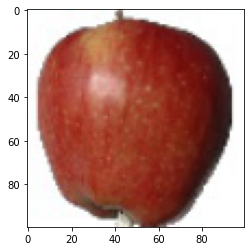

In [4]:
# displaying apple red 1

img = mpimg.imread('fruits_360_dataset/fruits_360/Training/Apple Red 1/101_100.jpg')
print(img.shape)
plt.imshow(img)

(100, 100, 3)


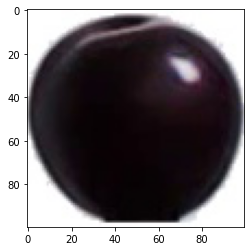

In [5]:
# displaying cherry wax black

img = mpimg.imread('fruits_360_dataset/fruits_360/Training/Cherry Wax Black/101_100.jpg')
print(img.shape)
plt.imshow(img)

In [16]:
import pathlib

train_path = pathlib.Path("fruits_360_dataset/fruits_360/Training")
test_path = pathlib.Path("fruits_360_dataset/fruits_360/fruits-360/Test")

VISUALIZING FRUITS FROM THE DATASET

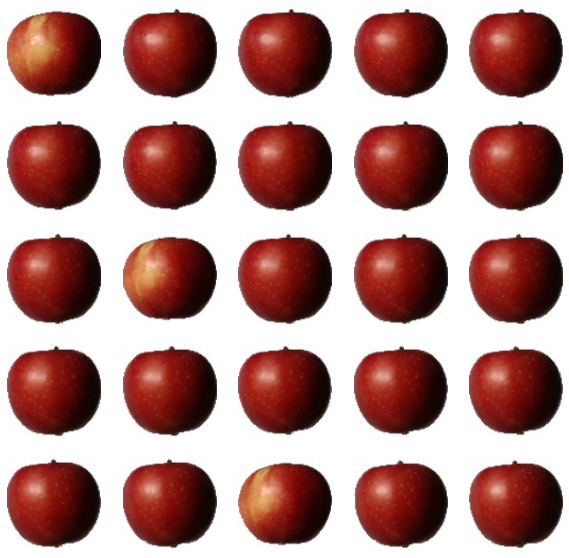

In [18]:
import PIL

fruits_apple_vis = list(train_path.glob("Apple Braeburn/*.jpg"))
plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = PIL.Image.open(str(fruits_apple_vis[i]))
    plt.imshow(img)
    plt.axis(False)
    
del fruits_apple_vis

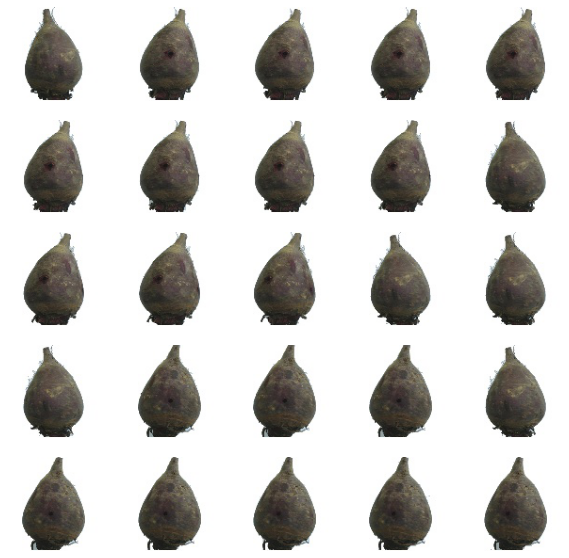

In [19]:
fruits_beetroot_vis = list(train_path.glob("Beetroot/*.jpg"))
plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = PIL.Image.open(str(fruits_beetroot_vis[i]))
    plt.imshow(img)
    plt.axis(False)

del fruits_beetroot_vis

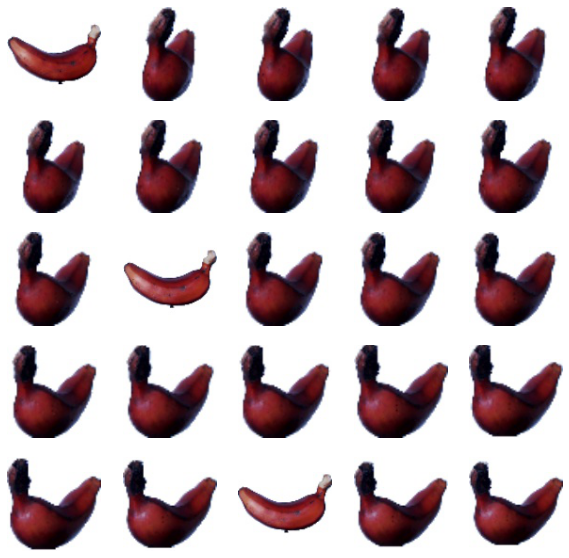

In [20]:
fruits_banana_red_vis = list(train_path.glob("Banana Red/*.jpg"))
plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = PIL.Image.open(str(fruits_banana_red_vis[i]))
    plt.imshow(img)
    plt.axis(False)

del fruits_banana_red_vis

COUNT OF TRAINING AND TESTING DATA

In [6]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("fruits_360_dataset/fruits_360/Training/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("fruits_360_dataset/fruits_360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("fruits_360_dataset/fruits_360/Test/"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("fruits_360_dataset/fruits_360/Test/"+ i)))

    
print("Count of Fruits in Training set:", sum(train_samples))
print("Count of Fruits in Set set:", sum(test_samples))

Count of Fruits in Training set: 67692
Count of Fruits in Set set: 22688


### Distribution of Fruits with counts in Training Set

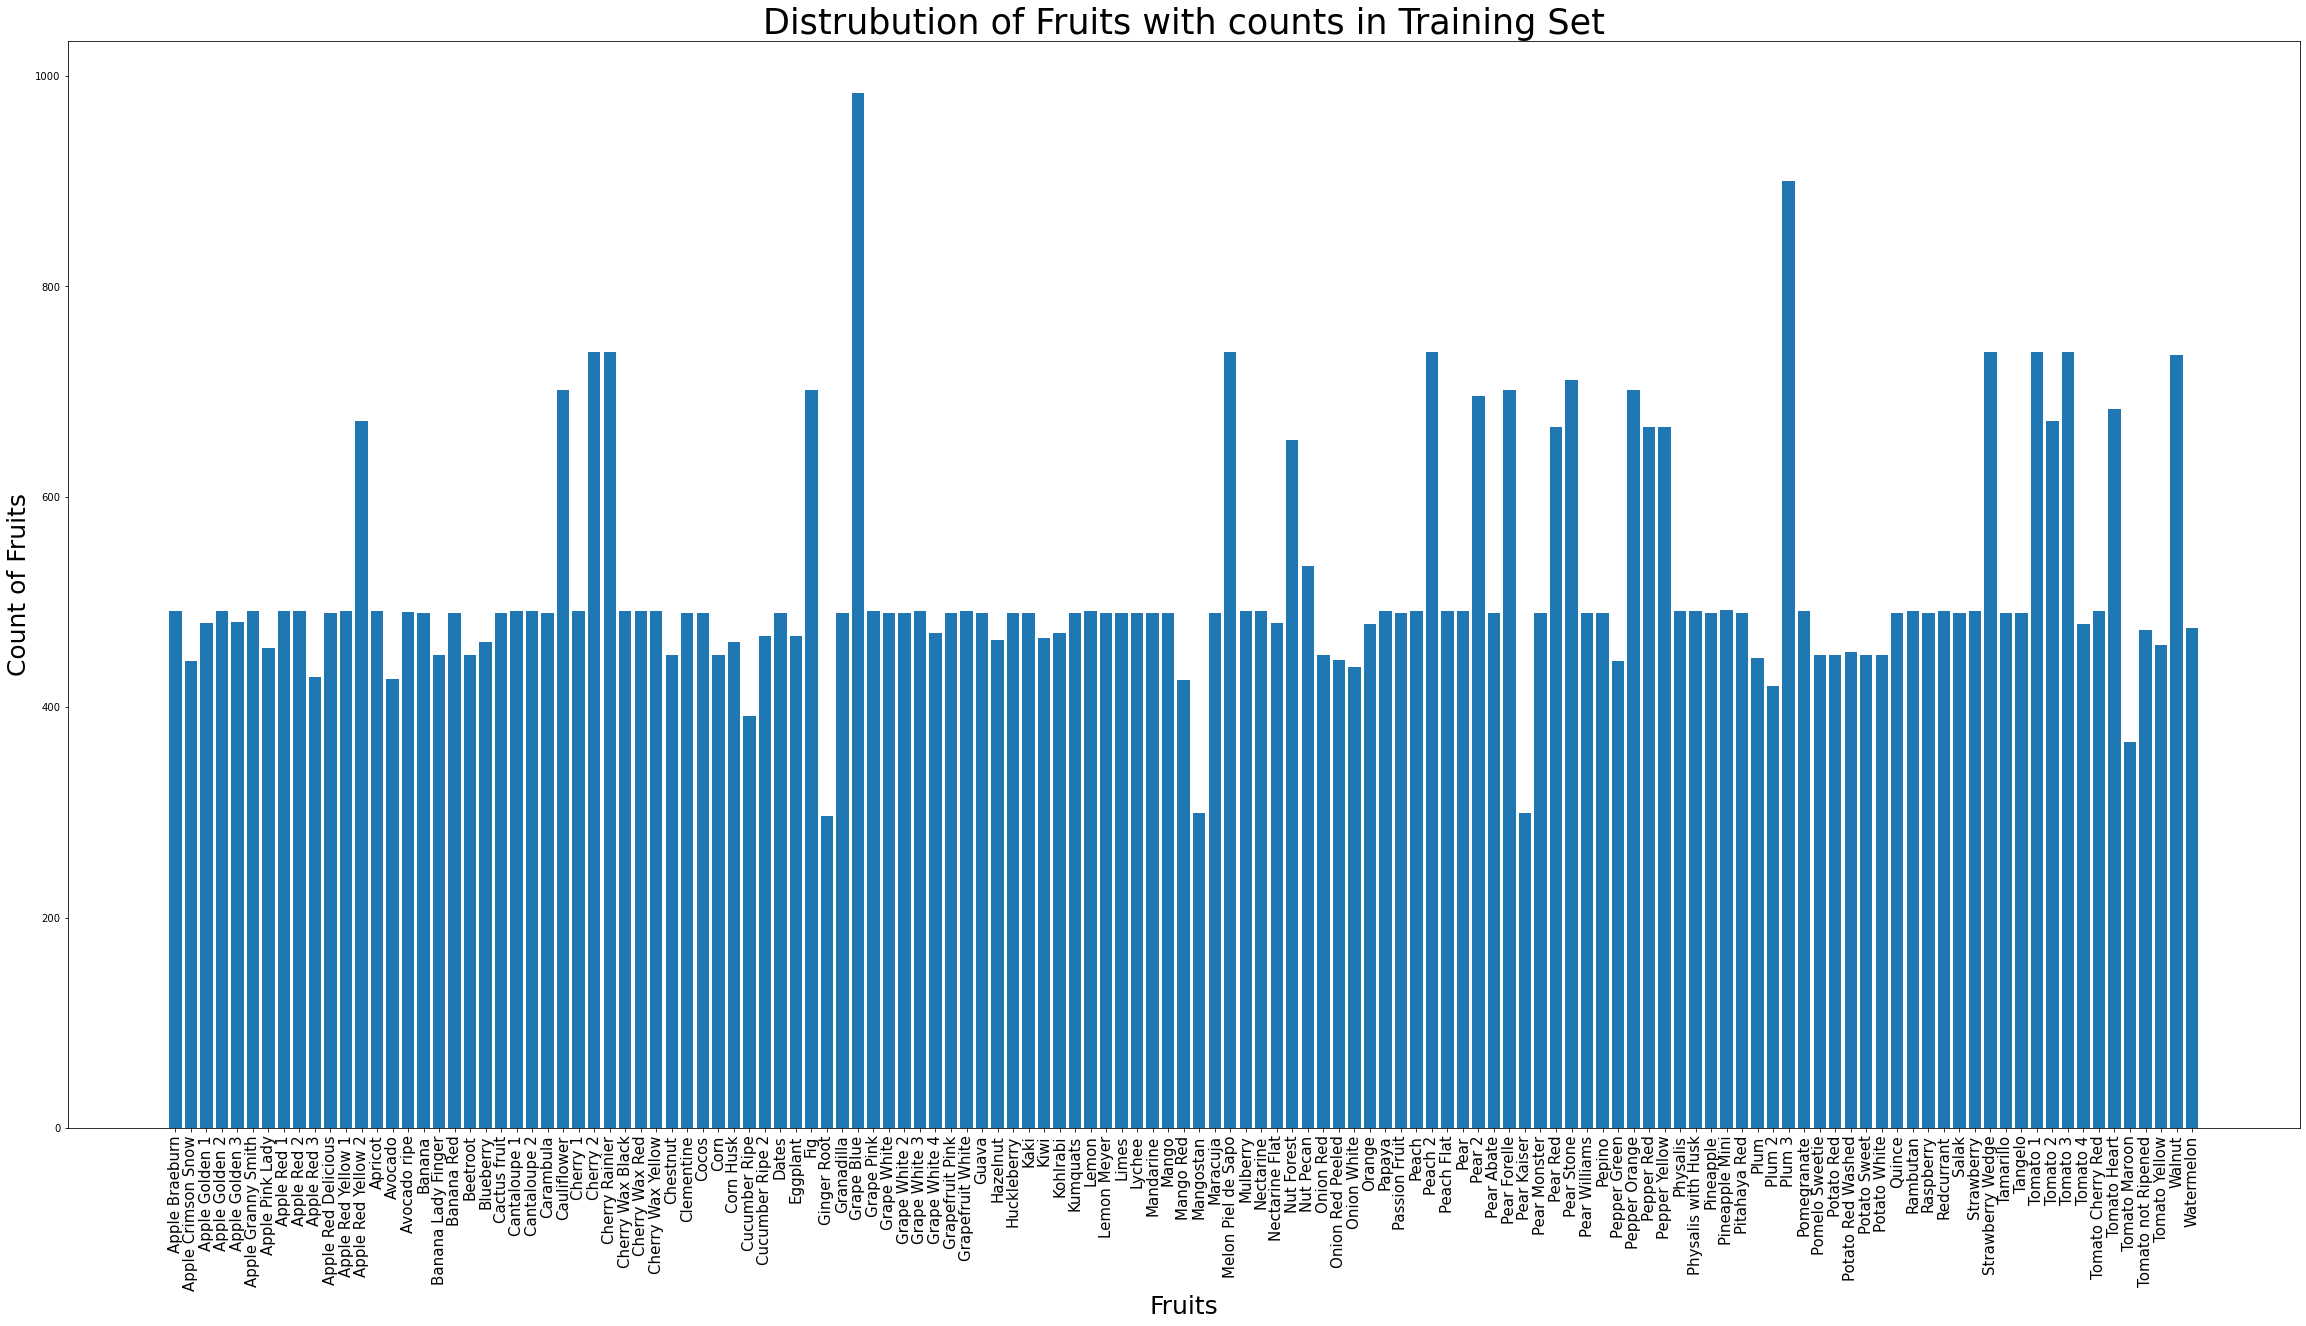

In [7]:
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show()

### Distribution of Fruits with counts in Test Set

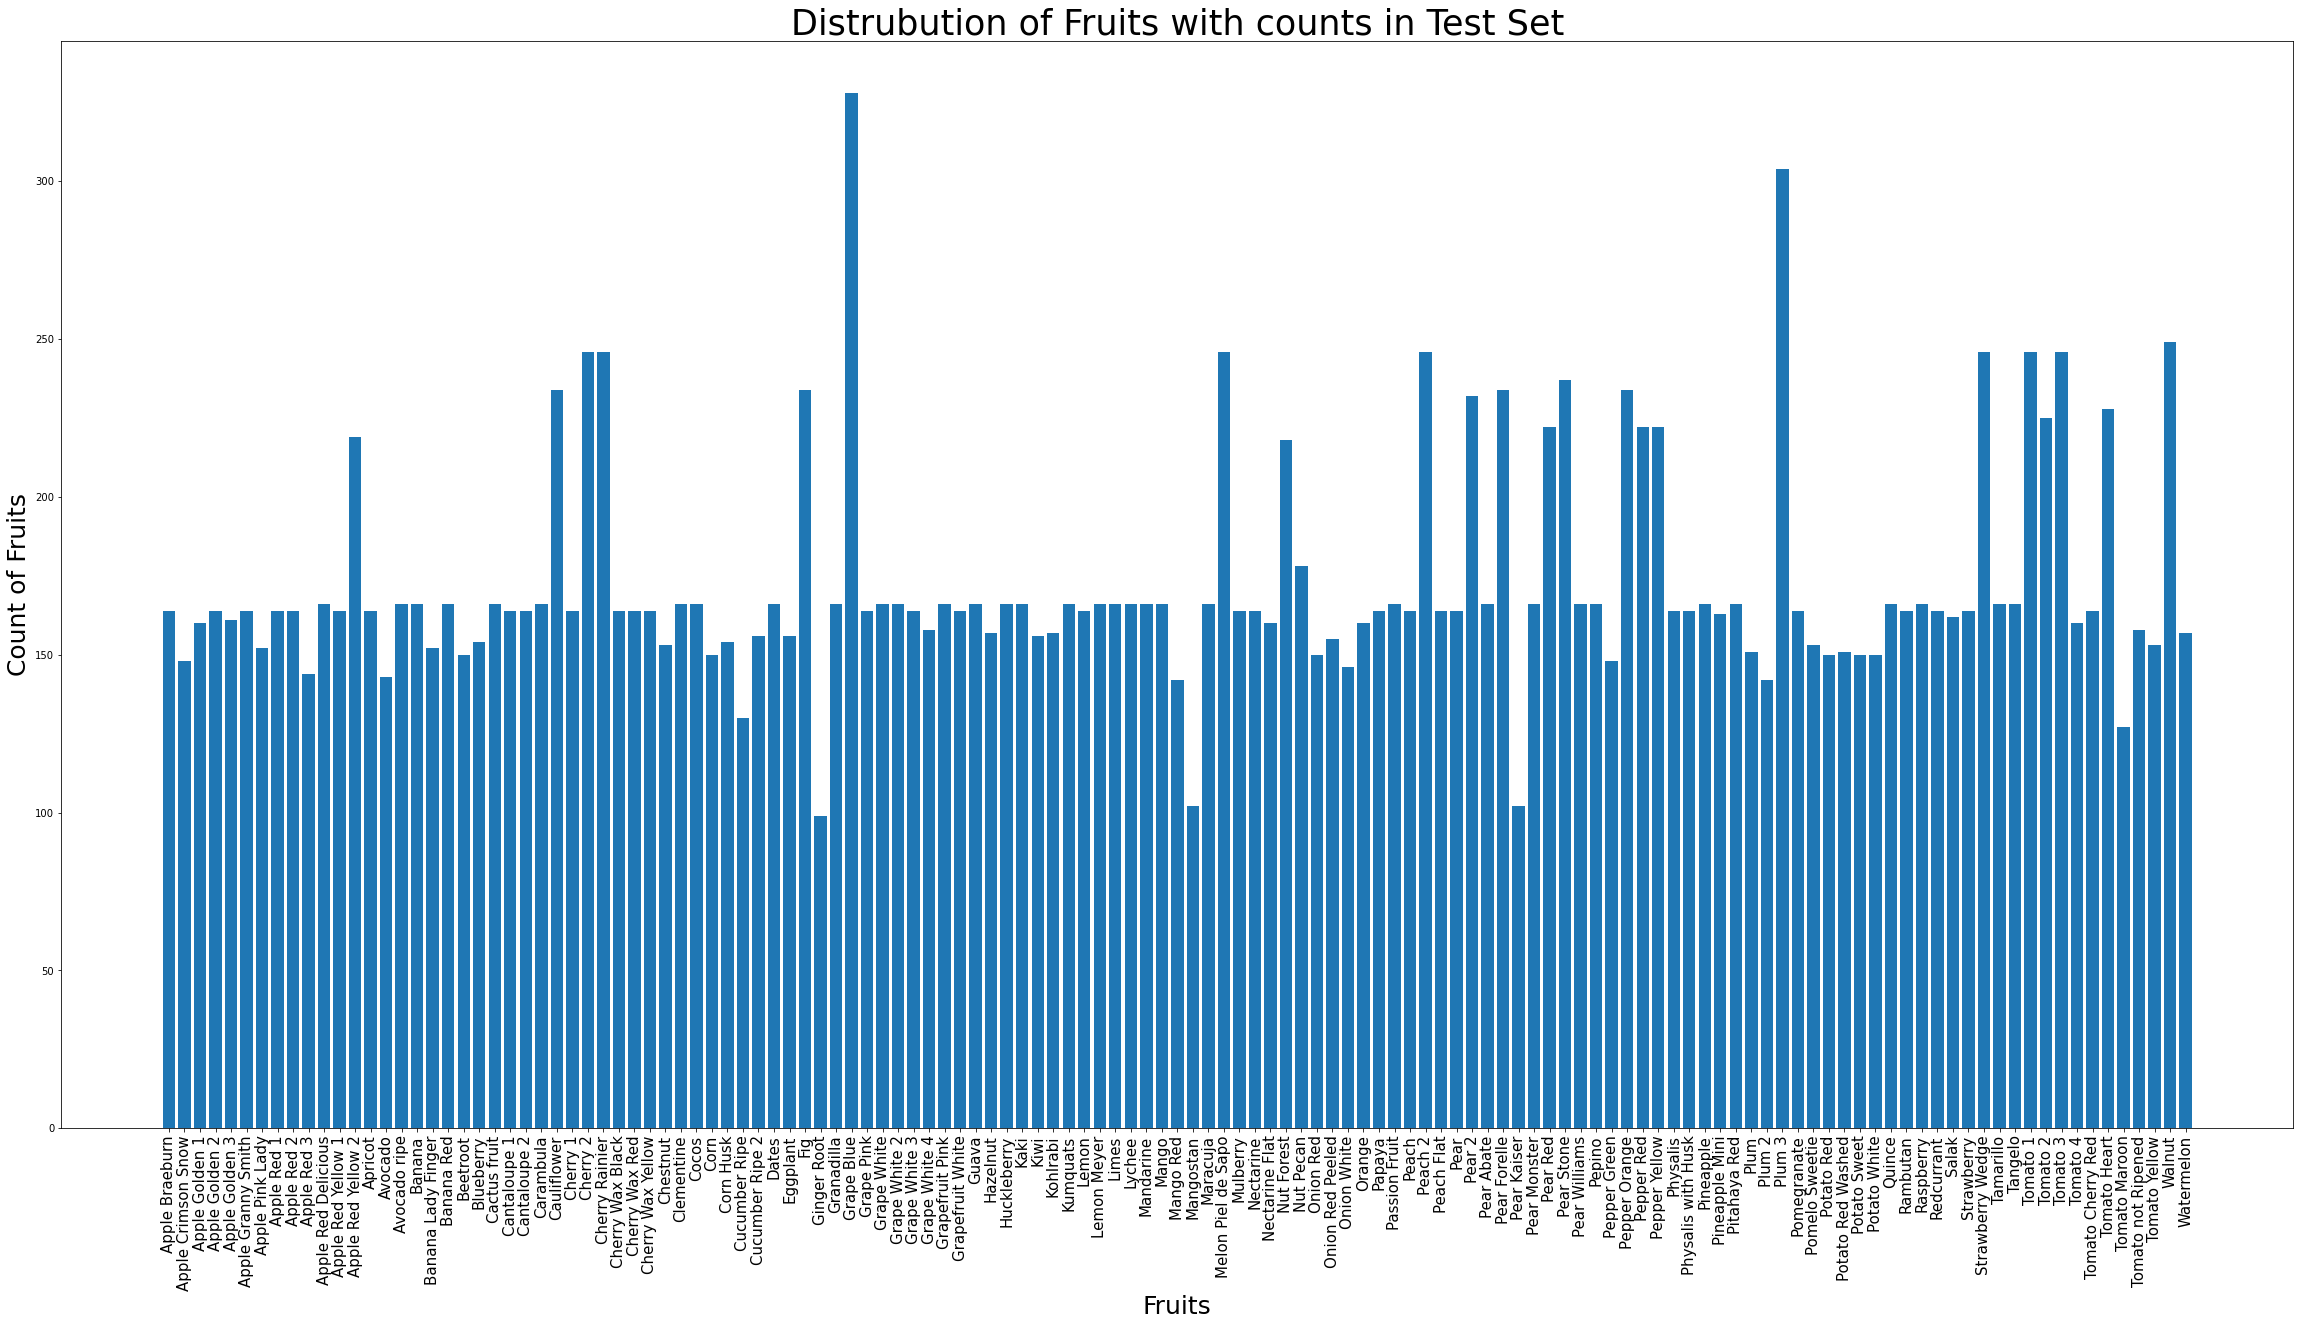

In [8]:
index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=35)
plt.show()

## DATA PREPROCESSING

DEFINING AN OBJECT THAT CONTAINS ALL THE CLASS LABELS

In [2]:
class_labels = ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3',
                'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious',
                'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger',
                'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 
                'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 
                'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2',
                'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 
                'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 
                'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 
                'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat', 
                'Nut Forest', 'Nut Pecan', 'Onion Red', 'Onion Red Peeled', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 
                'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser', 'Pear Monster',
                'Pear Red', 'Pear Stone', 'Pear Williams', 'Pepino', 'Pepper Green', 'Pepper Orange', 'Pepper Red', 
                'Pepper Yellow', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 
                'Plum 2', 'Plum 3', 'Pomegranate', 'Pomelo Sweetie', 'Potato Red', 'Potato Red Washed', 'Potato Sweet', 
                'Potato White', 'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 
                'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Heart', 
                'Tomato Maroon', 'Tomato Yellow', 'Tomato not Ripened', 'Walnut', 'Watermelon']

In [3]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'fruits_360_dataset/fruits_360/Training',
    labels="inferred",
    label_mode='categorical',
    class_names=class_labels,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

print(training_data)


Found 67692 files belonging to 131 classes.
<BatchDataset shapes: ((None, 256, 256, 3), (None, 131)), types: (tf.float32, tf.float32)>


Preprocessing the Testing Set

In [4]:
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'fruits_360_dataset/fruits_360/Test',
    labels="inferred",
    label_mode='categorical',
    class_names=class_labels,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

Found 22688 files belonging to 131 classes.


In [5]:
train_dir = 'fruits_360_dataset/fruits_360/Training/'
test_dir = 'fruits_360_dataset/fruits_360/Test/'

def load_dataset(data_path):
    data_loading = load_files(data_path)
    files_add = np.array(data_loading['filenames'])
    targets_fruits = np.array(data_loading['target'])
    target_labels_fruits = np.array(data_loading['target_names'])
    return files_add,targets_fruits,target_labels_fruits
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

In [6]:
no_of_classes = len(np.unique(y_train))
no_of_classes

131

Vector of the ytrain first record

In [7]:
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Dividing the Validation Set into Test and Validation Set

In [8]:
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 131)
Test X :  (15688,)
Test y :  (15688, 131)


DATA PREPROCESSING

In [9]:
def convert_image_to_array_form(files):
    images_array=[]
    for file in files:
        images_array.append(img_to_array(load_img(file)))
    return images_array

x_train = np.array(convert_image_to_array_form(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array_form(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array_form(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (15688, 100, 100, 3)
1st training image shape  (100, 100, 3)


Features scalling from 0-255 to 0-1

In [10]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

## CNN FUNCTION 

In [28]:
def tensorflow_based_model():
    model = Sequential() #step 1
    model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) #step2
    model.add(Activation('relu'))  # step3
    model.add(MaxPooling2D(pool_size=2)) #step4
    model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 32
    model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
    model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
    model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
    model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
    model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
    model.add(Dropout(0.3)) # step5
    model.add(Flatten()) #step 6
    model.add(Dense(150)) #step 7
    model.add(Activation('relu')) # setp 3
    model.add(Dropout(0.4)) # step 5
    model.add(Dense(131,activation = 'softmax')) # setp3 and step7. but this time, we are using activation function as softmax (if we train on two classes then we set sigmoid)
    return model #function returning the value when we call it

In [29]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

In [30]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=4,
        validation_data=(x_valid, y_vaild),
        verbose=2, shuffle=True)

Epoch 1/4
2116/2116 - 489s - loss: 0.9561 - accuracy: 0.7359 - val_loss: 0.6013 - val_accuracy: 0.8594
Epoch 2/4
2116/2116 - 468s - loss: 0.1411 - accuracy: 0.9539 - val_loss: 0.1848 - val_accuracy: 0.9567
Epoch 3/4
2116/2116 - 469s - loss: 0.0933 - accuracy: 0.9715 - val_loss: 0.2195 - val_accuracy: 0.9563
Epoch 4/4
2116/2116 - 471s - loss: 0.0771 - accuracy: 0.9771 - val_loss: 0.1962 - val_accuracy: 0.9659


In [31]:
acc_score = model.evaluate(x_test, y_test) #we are starting to test the model here
print('\n', 'Test accuracy:', acc_score[1])

491/491 [==============================] - 42s 85ms/step - loss: 0.1846 - accuracy: 0.9650

 Test accuracy: 0.965005099773407


## VISUALIZATION WITH PREDICTION

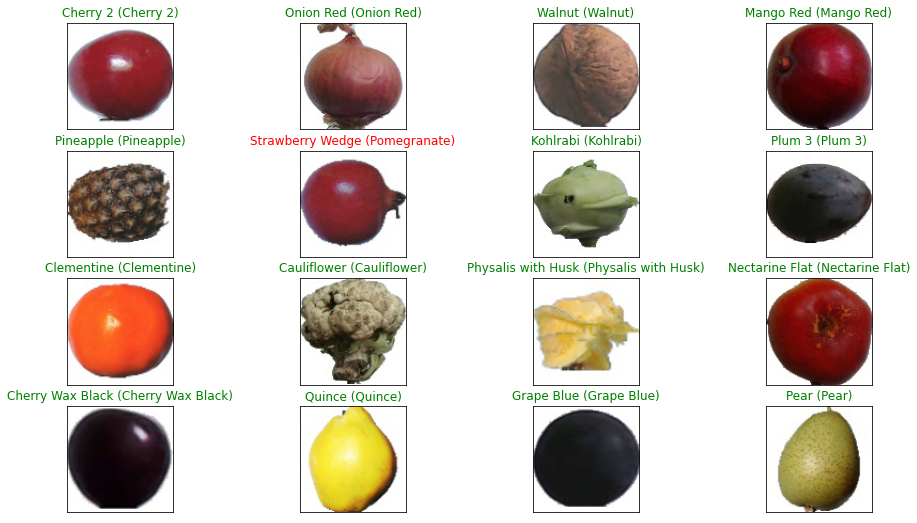

In [32]:
predictions = model.predict(x_test)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(predictions[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

### Visualizing Loss and Accuracy with respect to epochs

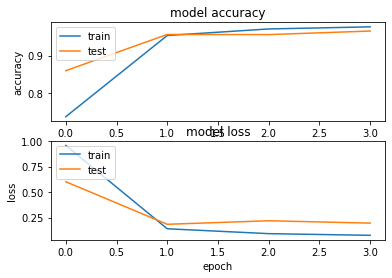

In [37]:
plt.figure(1)  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()